# Ch02.07. Seborn 실습 - fmri 데이터


---
* 날짜:2022-04-19
* 이름:안창덕

## 학습내용

    - pairplot을 이용해 모든 변수의 분포 및 관계를 시각화 한다.
    - relplot을 이용해 두 변수의 관계를 시각화 한다.


```
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.2, style='white', palette='Spectral')
```


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.2, style='white', palette='Spectral')


## **실습**
---



### (1) 데이터 기본 탐색

#### | 데이터 준비

```
fmri = sns.load_dataset('fmri')
fmri.head()
```

In [2]:
fmri = sns.load_dataset('fmri')
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


#### | 데이터 기본 탐색

In [3]:
fmri[fmri['subject']=='s13']

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
15,s13,17,stim,parietal,-0.008265
29,s13,16,stim,parietal,-0.002856
43,s13,15,stim,parietal,-0.010971
57,s13,14,stim,parietal,-0.033713
...,...,...,...,...,...
995,s13,1,cue,frontal,-0.010346
1016,s13,9,cue,frontal,-0.082955
1029,s13,8,cue,frontal,-0.070991
1040,s13,12,cue,frontal,-0.020686


In [4]:
fmri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   subject    1064 non-null   object 
 1   timepoint  1064 non-null   int64  
 2   event      1064 non-null   object 
 3   region     1064 non-null   object 
 4   signal     1064 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 41.7+ KB


In [5]:
fmri.describe()

,timepoint,signal
count,1064.000000,1064.000000
mean,9.000000,0.003540
std,5.479801,0.093930
min,0.000000,-0.255486
25%,4.000000,-0.046070
50%,9.000000,-0.013653
75%,14.000000,0.024293
max,18.000000,0.564985


In [10]:
print(fmri.subject.unique())
print(fmri.event.unique())
print(fmri.region.unique())

['s13' 's5' 's12' 's11' 's10' 's9' 's8' 's7' 's6' 's4' 's3' 's2' 's1' 's0']
['stim' 'cue']
['parietal' 'frontal']


### (2) Pair plot

```
seaborn.pairplot(data, *, 
                hue=None, 
                hue_order=None, 
                palette=None, 
                vars=None, 
                x_vars=None, y_vars=None
                kind='scatter', # {‘scatter’, ‘kde’, ‘hist’, ‘reg’}
                diag_kind='auto', # {‘auto’, ‘hist’, ‘kde’, None}
                markers=None, 
                height=2.5, aspect=1)¶
```

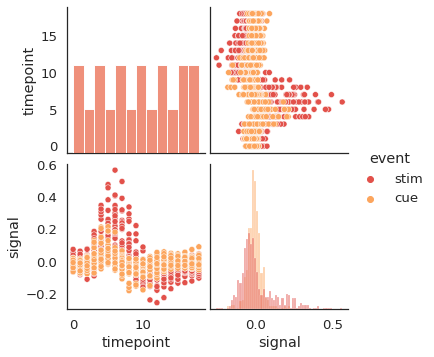

In [19]:
sns.pairplot(fmri, 
             hue='event', # 칼럼명, 해당 칼럼에 따라 색깔을 구분
             diag_kind='hist') #대각선의 본포플롯 종류

plt.show()

### (3) Relational plot

![](https://seaborn.pydata.org/_images/function_overview_8_0.png)

```
seaborn.relplot(x=None, y=None, 
                hue=None, 
                size=None, 
                style=None, 
                data=None, 
                row=None, col=None, 
                col_wrap=None,
                row_order=None, col_order=None, 
                palette=None, 
                hue_order=None, hue_norm=None, 
                sizes=None, size_order=None, size_norm=None,
                markers=None, dashes=None, style_order=None,
                legend='auto', # “auto”, “brief”, “full”, or False
                kind='scatter', # 'scatter', 'line'
                height=5, aspect=1, 
                facet_kws=None, 
                units=None)
```

In [26]:
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


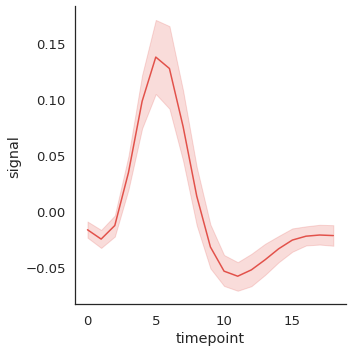

In [28]:
sns.relplot(data=fmri, x='timepoint', y='signal',
            kind='line')

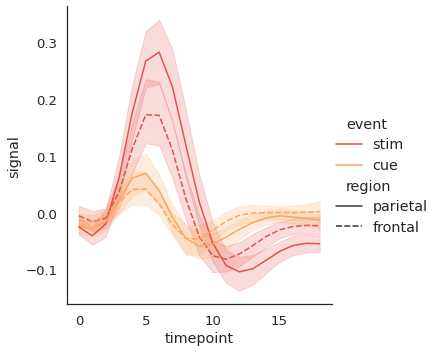

In [33]:
sns.relplot(data=fmri, x='timepoint', y='signal',
            kind='line', 
            hue='event',
            #size='region'
            style='region')

plt.show()

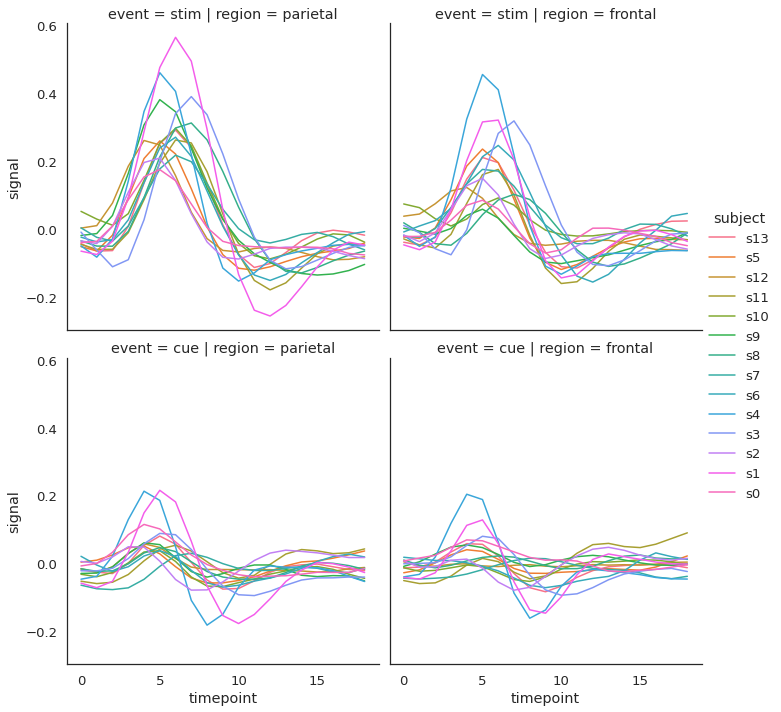

In [40]:
#실험자 별로 그래프 그리기
sns.relplot(data=fmri, x='timepoint',y='signal',
            hue='subject',
            kind='line',
            col='region',#영역 별로 플롯을 따로 그리기 (새로운 열)
            row='event') #이벤트별로 플롯을 따로 그리기 (새로운 행)


plt.show()

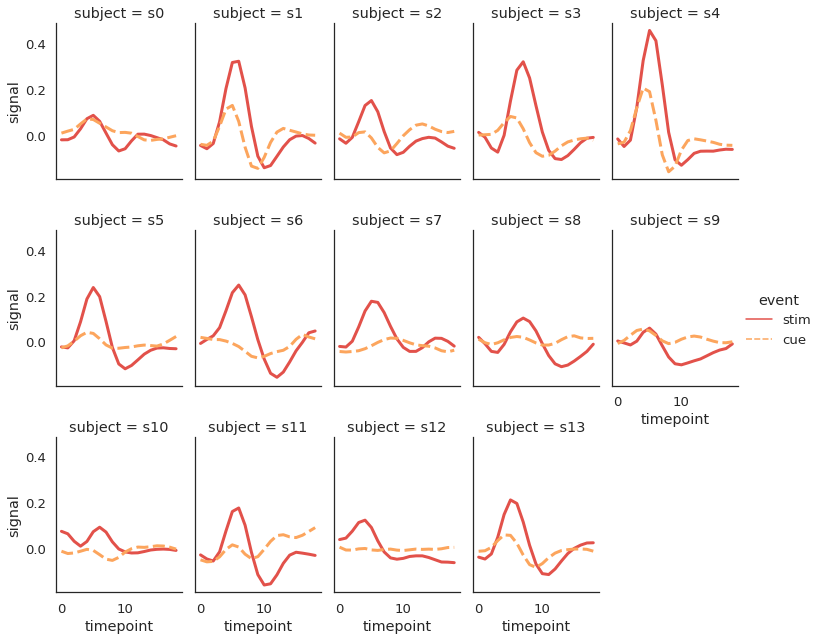

In [61]:
# 참가자별 플롯을 그려보자!
# region : frontal < parieta
# stim : 자극이 있을 때 없을 때 비교

mask = fmri.region == 'parieta'
fmri[mask]

#.query 마스크랑 비슷한 방법
sns.relplot(data=fmri.query("region=='frontal'"),
            x='timepoint', y='signal', kind='line',
            hue='event', col='subject',
            col_order=[f's{i}' for i in range(14)],
            col_wrap=5, #열 개수 조정
            aspect=.7, #그림 가로 사이즈
            height=3, #그림 세로 사이즈
            linewidth=3, #선굵기
            style = 'event')

plt.show()


## **과제: flights**
---

![](https://github.com/yebiny/SkillTreePython-DataAnalysis/blob/main/imgs/ch0207-03.png?raw=true)


### (1) 데이터 기본 탐색

#### | 데이터 준비

```
sns.load_dataset("flights")
```

In [64]:
df = sns.load_dataset("flights")
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [118]:
df.describe()

,year,passengers
count,144.000000,144.000000
mean,1954.500000,280.298611
std,3.464102,119.966317
min,1949.000000,104.000000
25%,1951.750000,180.000000
50%,1954.500000,265.500000
75%,1957.250000,360.500000
max,1960.000000,622.000000


### (2) Pair plot
seaborn.pairplot(data, *, 

                hue=None, 
                hue_order=None, 
                palette=None, 
                vars=None, 
                x_vars=None, y_vars=None
                kind='scatter', # {‘scatter’, ‘kde’, ‘hist’, ‘reg’}
                diag_kind='auto', # {‘auto’, ‘hist’, ‘kde’, None}
                markers=None, 
                height=2.5, aspect=1)¶

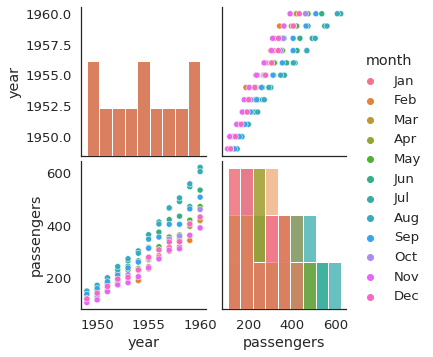

In [80]:
sns.pairplot(df,
             hue='month',
             diag_kind='hist')

plt.show()

### (3) Relational plot
seaborn.relplot(x=None, y=None, 

                hue=None, 
                size=None, 
                style=None, 
                data=None, 
                row=None, col=None, 
                col_wrap=None,
                row_order=None, col_order=None, 
                palette=None, 
                hue_order=None, hue_norm=None, 
                sizes=None, size_order=None, size_norm=None,
                markers=None, dashes=None, style_order=None,
                legend='auto', # “auto”, “brief”, “full”, or False
                kind='scatter', # 'scatter', 'line'
                height=5, aspect=1, 
                facet_kws=None, 
                units=None)

In [150]:
df.year.unique()

array([1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960])

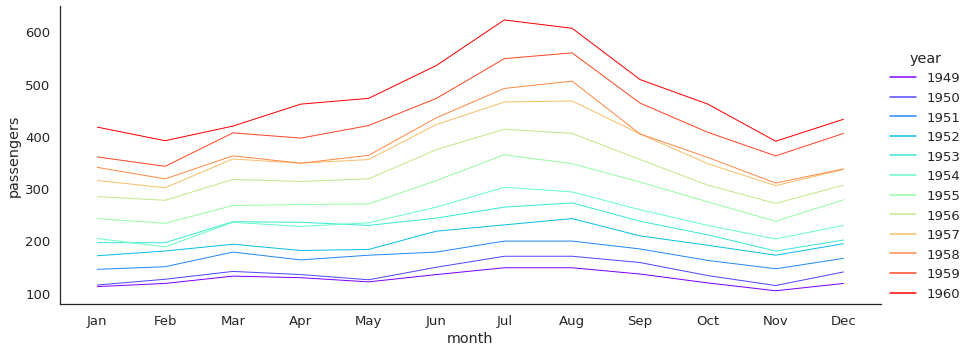

In [151]:
sns.relplot(data=df, x='month', y='passengers', kind='line',
            hue='year',
            legend='full',
            palette='rainbow', 
            aspect=2.5,
            height=5,
            linewidth=1)

plt.show()


## **과제: [Response of neurons](https://shadlenlab.columbia.edu/resources/RoitmanDataCode.html)**
---

![](https://github.com/yebiny/SkillTreePython-DataAnalysis/blob/main/imgs/ch0207-02.png?raw=true)


### (1) 데이터 기본 탐색

#### | 데이터 준비

```
sns.load_dataset("dots")
```

In [105]:
dots = sns.load_dataset("dots")
dots.head()

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


#### | 데이터 기본 탐색


In [103]:
dots.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   align        848 non-null    object 
 1   choice       848 non-null    object 
 2   time         848 non-null    int64  
 3   coherence    848 non-null    float64
 4   firing_rate  848 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 33.2+ KB


In [104]:
dots.describe()

,time,coherence,firing_rate
count,848.000000,848.000000,848.000000
mean,74.150943,12.898113,39.616662
std,284.596669,15.453506,12.232967
min,-600.000000,0.000000,6.275720
25%,-100.000000,3.200000,32.620191
50%,80.000000,6.400000,38.022005
75%,260.000000,12.800000,47.383649
max,720.000000,51.200000,70.048900


In [109]:
dots.choice.unique()

array(['T1', 'T2'], dtype=object)

In [113]:
dots['align'].unique()

array(['dots', 'sacc'], dtype=object)

### (2) Pair plot

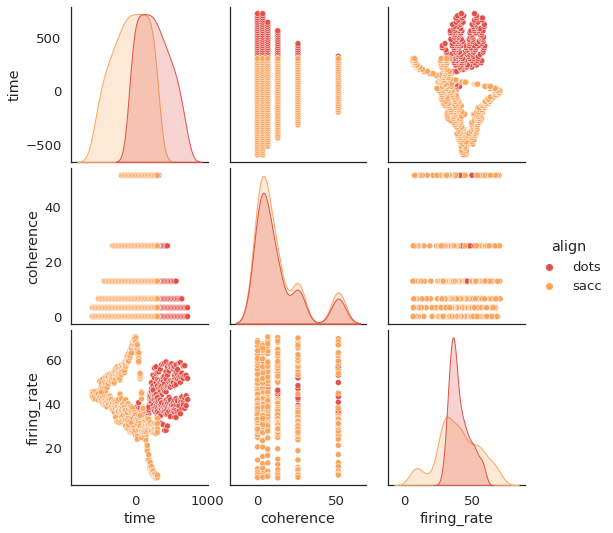

In [116]:
sns.pairplot(dots,
             hue='align')

plt.show()

### (3) Relational plot

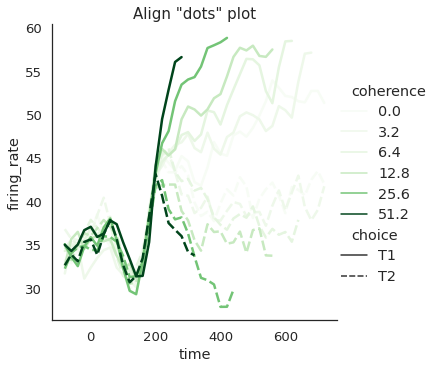

In [133]:
sns.relplot(data=dots.query("align=='dots'"), x='time', y='firing_rate', kind='line',
            hue='coherence', #색깔로 구분
            palette='Greens',
            style='choice',   #모양으로 구분
            linewidth=2.5)
            
plt.title('Align "dots" plot', fontsize=15)
plt.show()